In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [6]:
car_price=pd.read_csv("CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
car_price1=car_price.drop("CarName",axis=1)
car_price1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
np.random.seed(42)

X=car_price1.drop("price",axis=1)
y=car_price1["price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

# model.fit(X_train,y_train)


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [0.0e+00, 1.0e+00, 1.0e+00, ..., 5.5e+03, 1.8e+01, 2.3e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 4.8e+03, 2.6e+01, 2.7e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 5.4e+03, 1.9e+01, 2.5e+01]])

In [10]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
201,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
202,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
203,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


In [11]:
np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(transformed_X,
                                                  y,
                                                  test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9573684926800377

In [12]:
car_price1.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1]:
car_price1.corr()

NameError: name 'car_price1' is not defined

C:\Users\nepal\AppData\Local\Temp\ipykernel_15572\1292885750.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_price1.corr(),annot=True,cmap='Blues')


<Axes: >

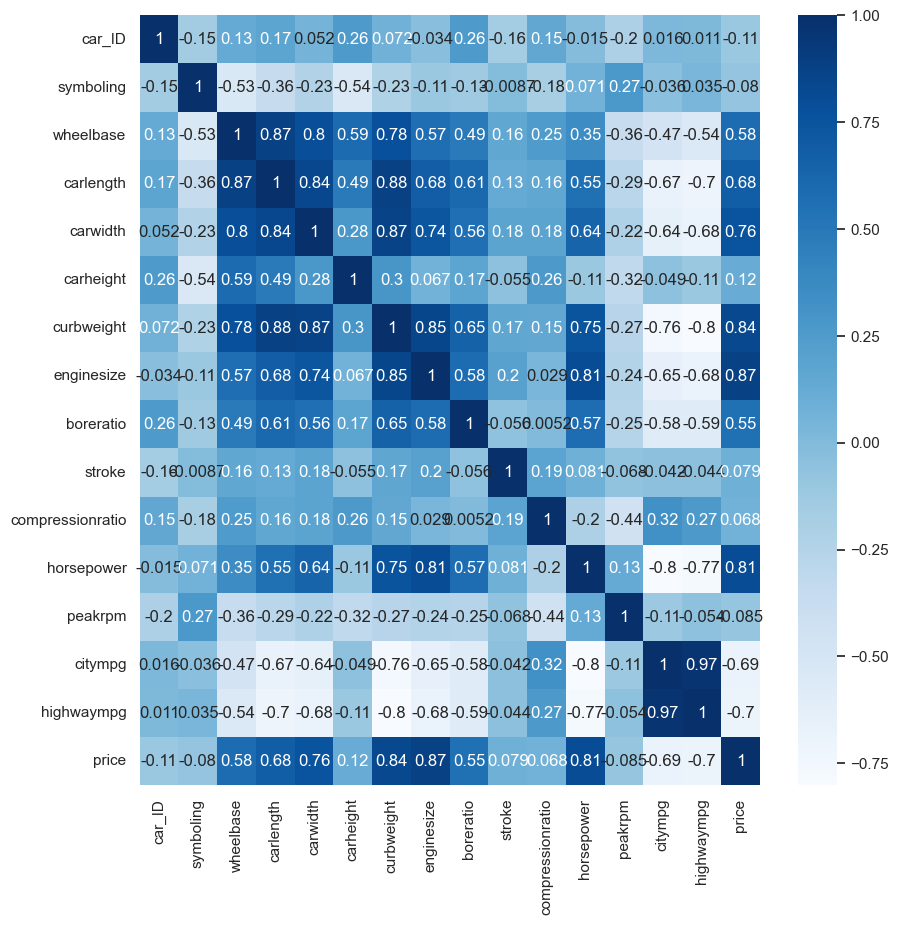

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(car_price1.corr(),annot=True,cmap='Blues')

In [15]:
car_price1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000
